# Worksheet 2

### This is the second set of exercises for the Open Quantum Systems course. As before, there are both analytical and numerical components to the exercises. Each of the 8 questions below is worth 10 marks. 

---

1. Hamiltonian dynamics for mixed states (in the Schrödinger picture) is described by the von Neumann equation 

$$\frac{{\rm d}\hat{\rho}}{{\rm d}t} = \frac{1}{{\rm i}\hbar}[\hat{H},\hat{\rho}].$$

Suppose that the Hamiltonian comprises a sum of two terms, $\hat{H} = \hat{H}_0 + \hat{H}_1$. The density matrix in the interaction picture generated by $\hat{H}_0$ is defined by

$$ \hat{\rho}_I(t) = \hat{U}^\dagger_0(t,t_0) \hat{\rho}(t) \hat{U}_0(t,t_0),$$

where $\hat{U}_0(t,t_0) = {\rm e}^{-{\rm i}\hat{H}_0 (t-t_0)/\hbar}$, $\hat{\rho}(t)$ is the density matrix in the Schrödinger picture, and $t_0$ is an (arbitrary) initial time. Show that the state in the interaction picture obeys a differential equation of the form

$$ \frac{{\rm d}\hat{\rho}_I}{{\rm d}t} = \frac{1}{{\rm i}\hbar} [\hat{H}_I(t), \hat{\rho}_I(t)],$$

and give an explicit expression for the interaction-picture Hamiltonian $\hat{H}_I(t)$. What is the general solution of this equation in terms of the initial condition $\hat{\rho}(t_0)$?


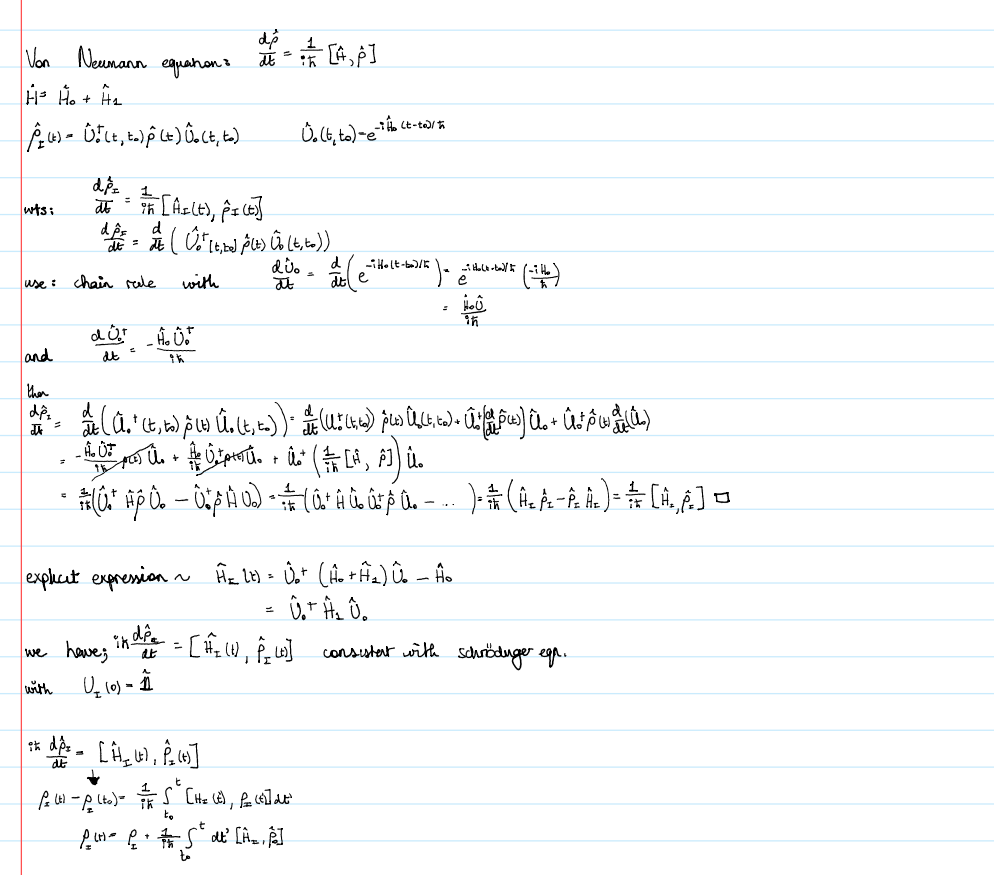

2. A thermal equilibrium state is a mixed state with two key properties: <br>
    (i) it is stationary (unchanging) under Hamiltonian dynamics and <br>
    (ii) the probability $p_i$ of finding the system with energy $E_i$ is given by the Boltzmann distribution of statistical mechanics, i.e. $p_i = {\rm e}^{-\beta E_i}/Z$, where $\beta = 1/k_BT$ is the inverse temperature and $Z = \sum_i {\rm e}^{-\beta E_i}$ is the partition function.<br>
    
    In quantum mechanics, the thermal state of a system whose dynamics are governed by the Hamiltonian $\hat{H}$ is given by
    
    $$\hat{\rho}_\beta = \frac{{\rm e}^{-\beta \hat{H}}}{Z}, $$
    
    where $Z = {\rm tr}[{\rm e}^{-\beta \hat{H}}]$.
    
    (a) Show that this state obeys both properties (i) and (ii).    
    
    (b) For a qubit with Hamiltonian $\hat{H} = \tfrac{1}{2}\hbar\omega \hat{\sigma}_z$, show that
    
    $$ \hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbb{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right].$$
    
    (Hint: take a look at Exercise 1(a), Worksheet 1)
    
    (c) Find analytical expressions for the expectation values of the three Pauli matrices in the above thermal equilibrium state. Plot the thermal expectation value of $\langle \hat{\sigma}_z\rangle$ as a function of dimensionless temperature, $k_B T/\hbar\omega$.

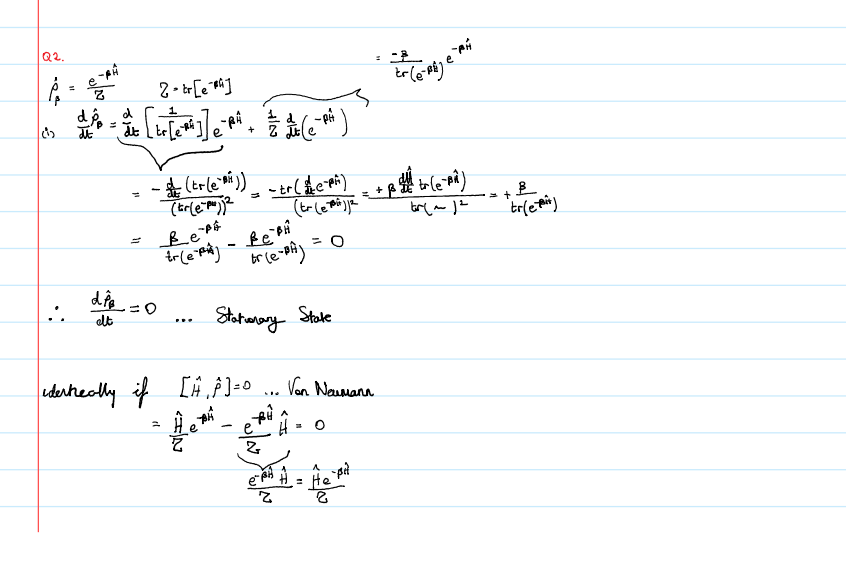

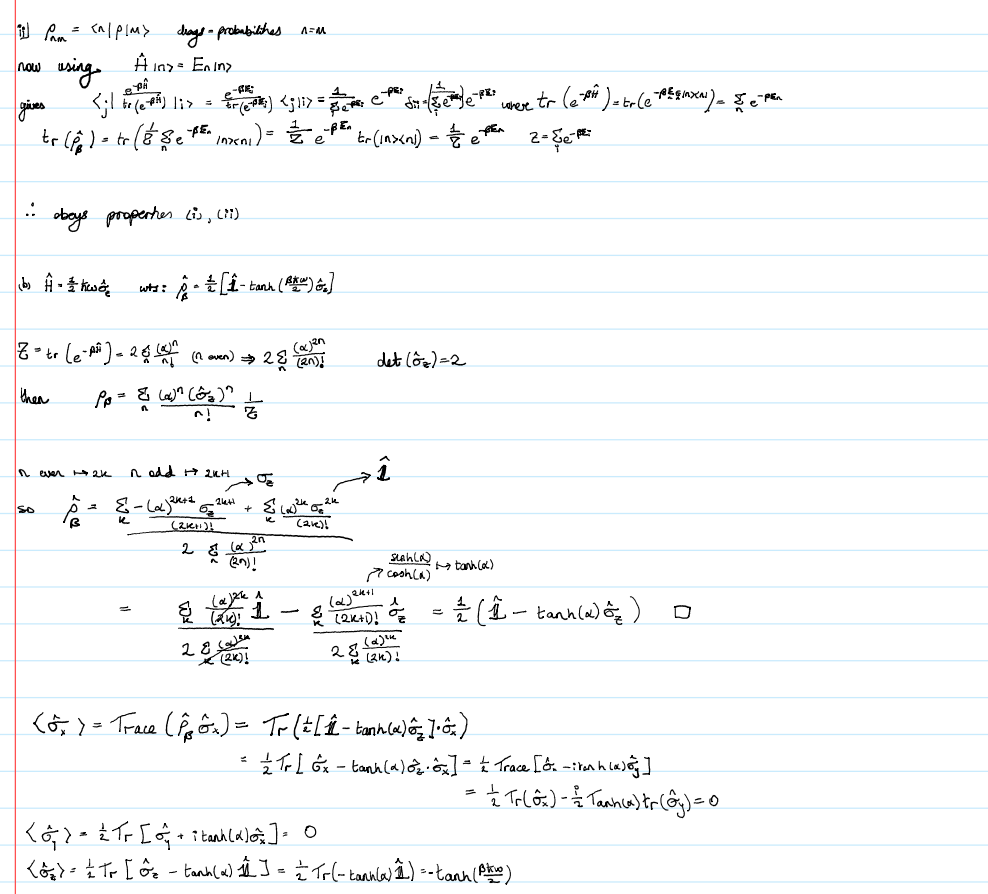

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as l
from random import choices
import scipy
from scipy.linalg import expm , cosm, sinm
import seaborn as sns# generate random numbers from N(0,1)
cl = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0'
      , '#f032e6', '#bcf60c', 'red', '#008080', 'indigo', '#9a6324',
      '#800000', 'magenta', '#808000', 'darkgreen', '#000075', '#808080',  '#000000']

In [113]:
def thermal_expz(v):
    return (-1)*np.tanh((2*v)**(-1))

Text(0.5, 1.0, 'A plot of the thermal expectation value of $< \\hat{\\sigma}_z>$')

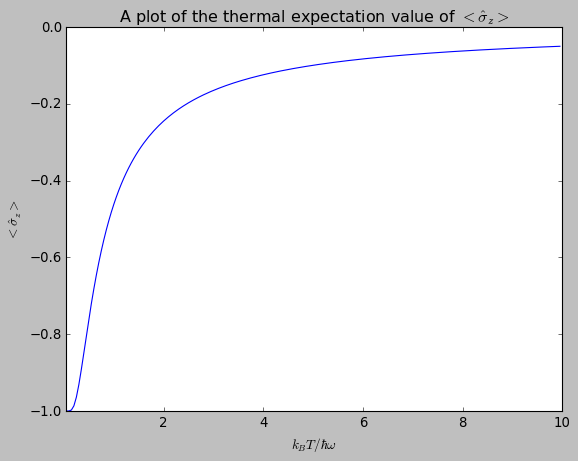

In [114]:
temp = np.arange(0.05,10,0.05)
plt.plot(temp,thermal_expz(temp))
plt.xlim(0.05,10)
plt.xlabel('$k_B T/\hbar\omega$')
plt.ylabel('$< \hat{\sigma}_z>$')
plt.title('A plot of the thermal expectation value of $< \hat{\sigma}_z>$')

3. The following function samples a "biased coin", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works.

In [115]:
from random import random
def biased_coin(p):
    #prints a number between 0 and 1
    r = random()
    if r<p:
        return 0
    else:
        return 1

(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function).

Text(0.5, 1.0, 'Histogram of 200 realisations of the output of biased_coin(p = 0.3)')

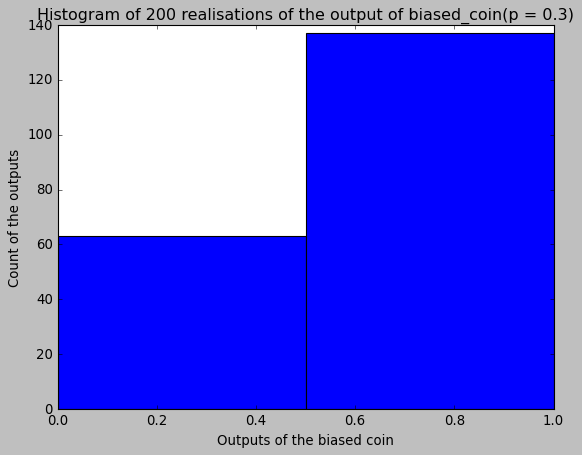

In [116]:
i = 0
realisations = np.zeros(200)
while i<200:
    realisations[i] = biased_coin(0.3)
    i+=1
n , bins , patches = plt.hist(realisations, 2, density = False)
plt.xlabel('Outputs of the biased coin')
plt.ylabel('Count of the outputs')
plt.title('Histogram of 200 realisations of the output of biased_coin(p = 0.3)')


(b) Write an analogous function that samples a "three-sided coin", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$.

In [117]:
num = range(3)
p_0 = 0.2
p_1 = 0.5

def biased_3coin(p_0, p_1):
    r = random()
    if r<p_0:
      return 0
    elif r<p_1+p_0:
      return 1
    else:
      return 2

Below is a histogram plot of 200 samples of the output for a 3 sided coin with $p_0=0.2$ and $p_1 = 0.5$.

Text(0.5, 1.0, '$p_0=0.2$ and $p_1 = 0.5$')

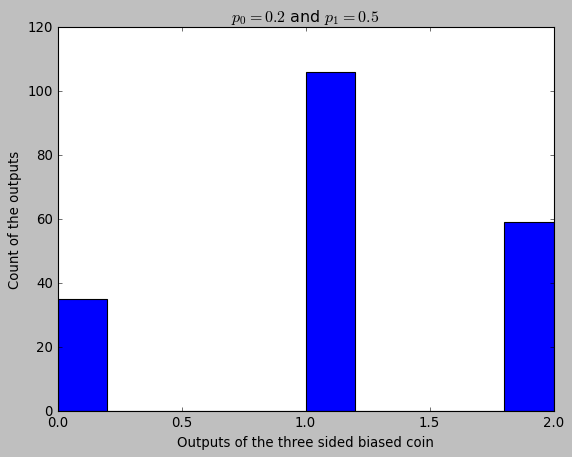

In [118]:
realisations2 = np.zeros(200)
i = 0
while i<200:
    realisations2[i] = biased_3coin(0.2,0.5)
    i+=1
plt.hist(realisations2)
plt.xlabel('Outputs of the three sided biased coin')
plt.ylabel('Count of the outputs')
plt.title('$p_0=0.2$ and $p_1 = 0.5$')

(c) Generalise the function to an "$N$-sided coin", which yields the result $i \in \{0,1,2,\ldots,N-1\}$ with probability $p_i$. Provide a histogram demonstrating that the function works as expected.

In [119]:

n = 5
np.array([1/n for i in range(n)])

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [120]:
p = [.1,.2,.4,.3]

def biased_Ncoin(N,p):
    
    '''This function will take as input the number of sides of the coin ,N, and the respective
    probabilities of landing on one of these sides, and will output a random realisation of this'''
    r = random()
    cum_p = 0
    for i in range(N): 
      cum_p+=p[i] 
      if r<cum_p: return i


In [121]:
realisations3 = np.zeros(1000)
j = 0
while j<1000:
    realisations3[j] = biased_Ncoin(4,p)
    j+=1
#realisations3

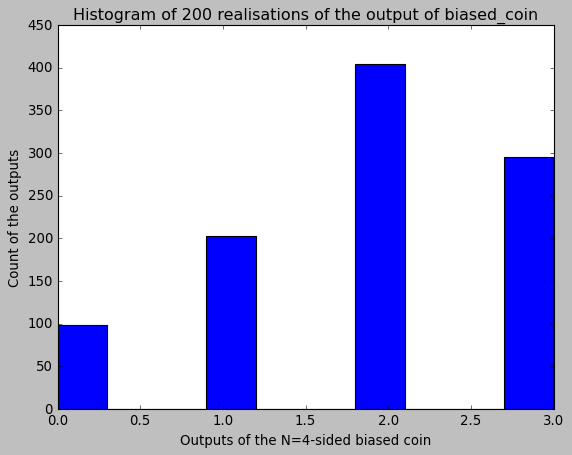

In [122]:
plt.hist(realisations3)
plt.xlabel('Outputs of the N=4-sided biased coin')
plt.ylabel('Count of the outputs')
plt.title('Histogram of 200 realisations of the output of biased_coin')

p = [.1,.2,.4,.3]


4. In this exercise we will compare the thermal state of a qubit
$$ \hat{\rho}_\beta = \frac{{\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2}}{Z},$$
to the pure state
$$|\psi_\beta\rangle = \frac{1}{\sqrt{Z}}\left({\rm e}^{-\beta\hbar\omega/4}|0\rangle + {\rm e}^{\beta\hbar\omega/4}|1\rangle\right), $$
where $Z = {\rm tr}({\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2})$.

    (a) Write down general expressions for the density matrices corresponding to both of the above states.

    (b) Consider a projective measurement of the observable $\hat{\sigma}_z$. Give the probabilities of the two measurement outcomes for the thermal state $\hat{\rho}_\beta$. Give the analogous measurement outcome probabilities for the pure state $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_z\rangle$ for both states. Comment briefly on the results.

    (c) Now consider a projective measurement of the observable $\hat{\sigma}_x$. Give the measurement outcome probabilities for the two different states $\hat{\rho}_\beta$ and $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_x\rangle$ for both states. Comment briefly on the results.

    (d) Repeat the calculations for a projective measurement of $\hat{\sigma}_y$ and briefly comment on the result.
    
 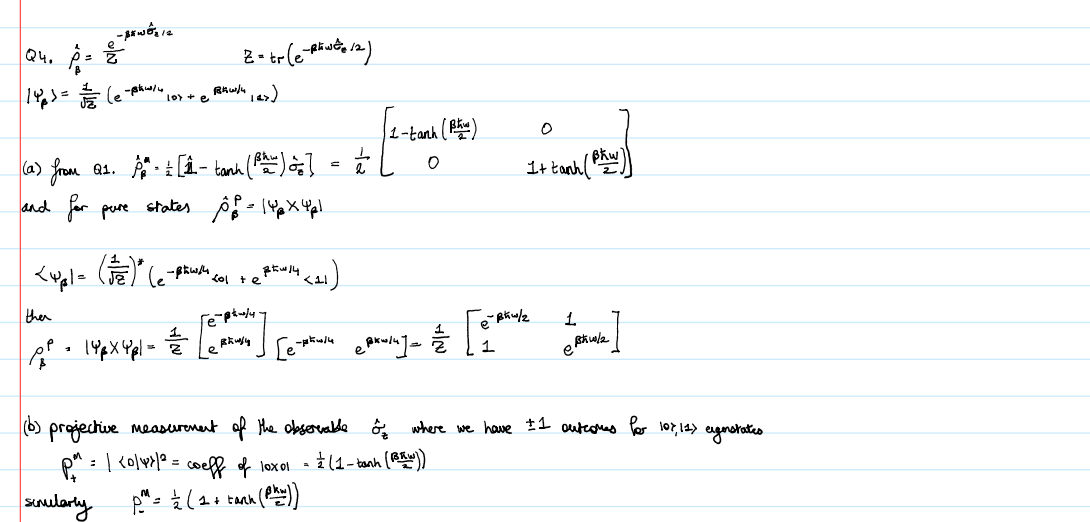
 
 



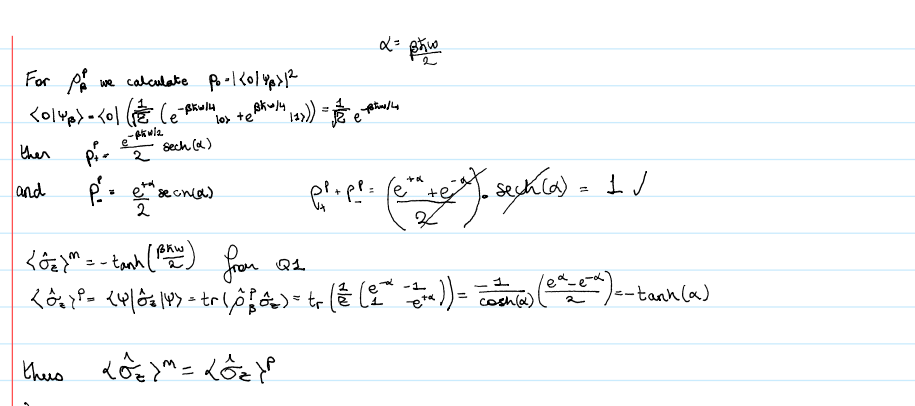

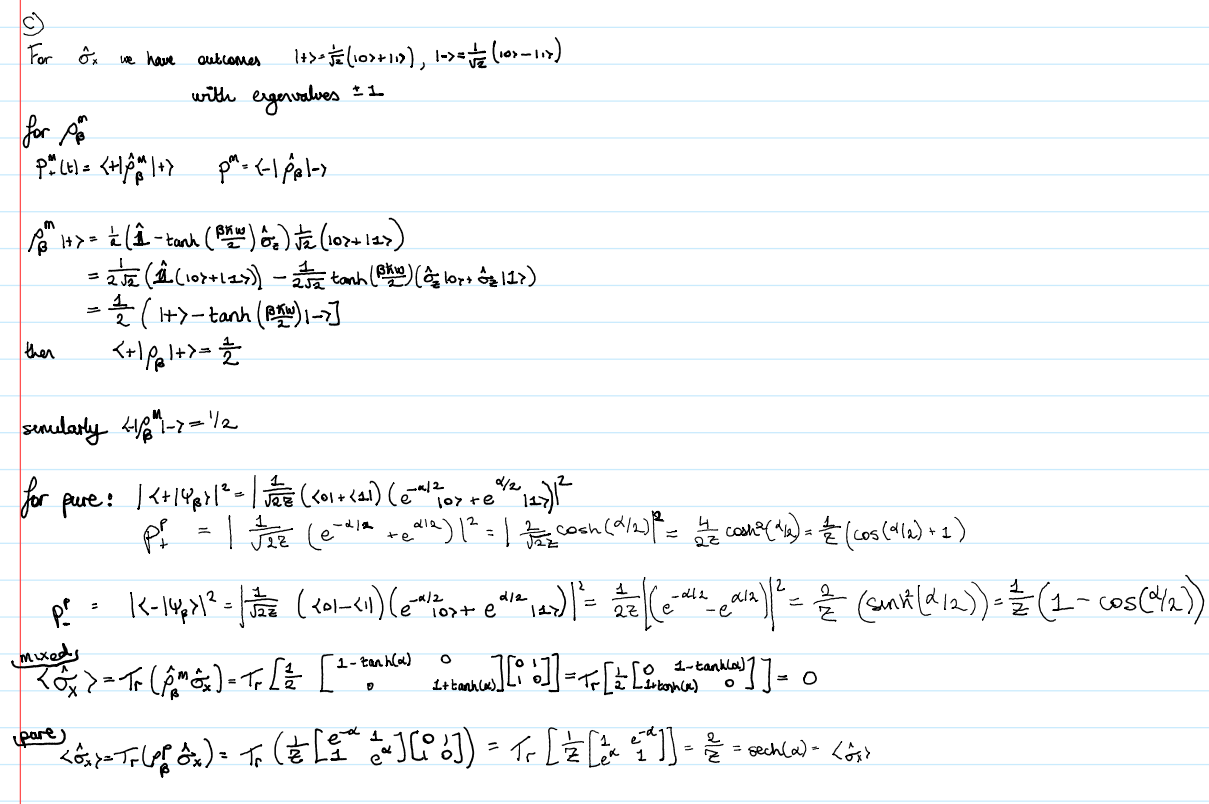


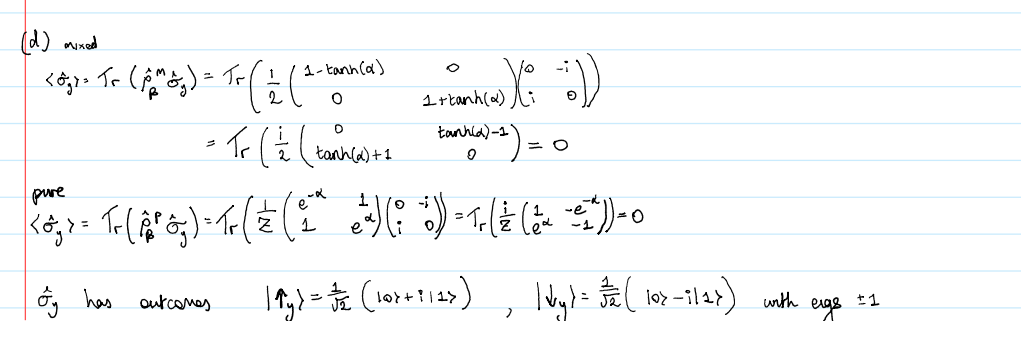

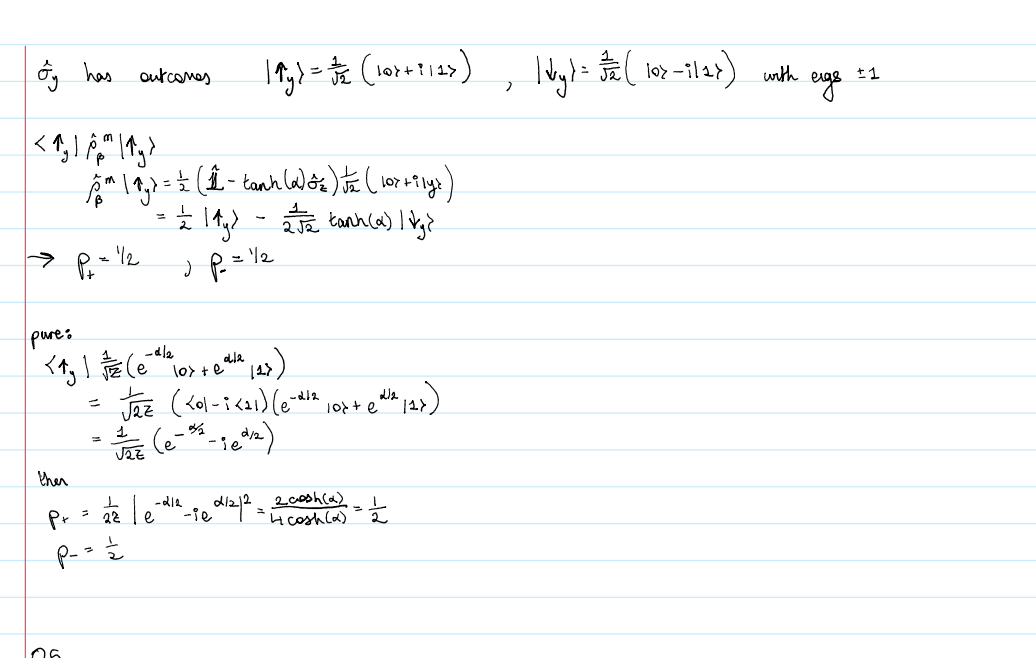

### Comments
(b) Here the two expected values corresponding to a measurement in sigma_z match meaning that the pure state and the thermal state agree in this scenario.

(c) for the measurement of the observable sigma_x the pure state and the thermal state disagree by a factor of sech($\alpha$) which corresponds to the off diagonal terms being non zero, introducing fluctuations in the sigma_x expectation value

(d) similarly as for (b) we have that the expectation values for b match and equal zero

In [125]:
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

5. Consider the following simple decoherence model for a qubit. The Hamiltonian is 
    $$ \hat{H} = \frac{\hbar\omega}{2} \hat{\sigma}_z,$$
    where $\omega$ is a random variable that takes the values $\omega \in \{+\omega_0,-\omega_0\}$ with equal probabilities $p_+ = p_- = \tfrac{1}{2}$.
    
    (a) Write down an analytical expression for the time-dependent density matrix describing the ensemble, starting from the initial condition $\hat{\rho}(0) = |+\rangle\langle +|$.
    
    (b) The purity $P$ is defined by $P={\rm tr} \hat{\rho}^2$. It is a real number that varies between $P=1$ for a pure state and $P = 1/2$ for a maximally mixed state of a qubit. (More generally, $P$ varies between $1$ and $1/d$ for a system with Hilbert-space dimension $d$.) Plot the purity of the qubit density matrix as a function of time in the interval $\omega_0 t = [0,10]$. Comment briefly on what happens at $t = \pi/2\omega_0 $, $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$.

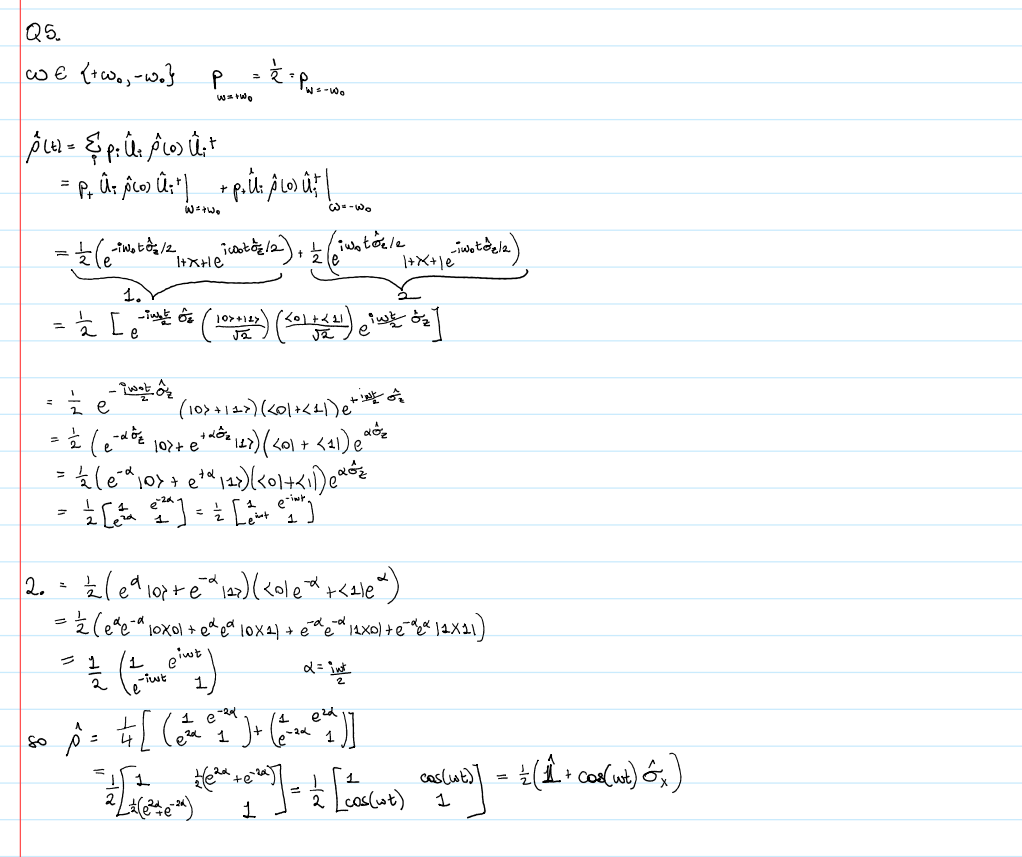

In [126]:
wt = np.arange(0,10+np.pi/40,np.pi/40)
rho5 = np.zeros((len(wt),2,2))
purity = np.zeros((len(wt),1))
np.where(wt == 2*np.pi)

(array([80], dtype=int64),)

(0.0, 10.0)

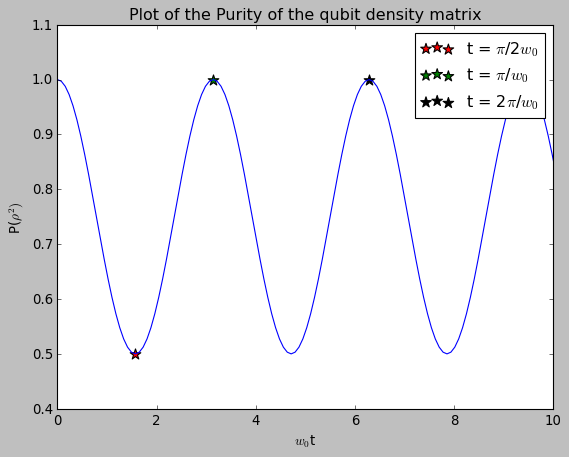

In [127]:

for i in range(len(wt)):
    rho5[i] = (1/2)*(np.eye(2)+np.cos(wt[i])*sigma_x)
    purity[i] = np.trace((rho5[i])@rho5[i])

plt.plot(wt,purity)
plt.scatter(np.pi/2,purity[np.where(wt == np.pi/2)], s = 100,marker = '*', c = 'r',label = 't = $\pi$/2$w_0$')
plt.scatter(np.pi,purity[np.where(wt == np.pi)], s = 100,marker = '*', c = 'green',label = 't = $\pi$/$w_0$')
plt.scatter(2*np.pi,purity[np.where(wt == 2*np.pi)], s = 100,marker = '*', c = 'black',label = 't = 2$\pi$/$w_0$')
plt.legend()
plt.title('Plot of the Purity of the qubit density matrix')
plt.xlabel('$w_0$t')
plt.ylabel('P($\\rho^2)$')
plt.xlim(0,10)

In this plot of the Purity of the qubit density matrix we have that at t = $\pi$/2$w_0$ the purity is at a minmum. This corresponds to the maximally mixed state which is the point in time where the entanglement between the two qubits is
maximal. This lost purity is a consequence of correlations developing between the two systems. 


As time evolves the systems become uncorrelated and the system becomes pure again at t = $\pi$/$w_0$, hence the purity reaches one of its maxima. The two systems are no longer entangled and would be found along the outside of the Bloch sphere. The purity passes through one more cycle before arriving at another maxima at the point t = 2$\pi$/$w_0$. 


6. Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations
$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$

(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

In [128]:
zero = np.array([[1],[0]])
one = np.array([[0],[1]])
plus = (1/np.sqrt(2))*(zero + one)
minus = (1/np.sqrt(2))*(zero - one)

Text(0.5, 1.0, ' Plot of the expectation value $\\langle \\hat{\\sigma}_x\\rangle$ for 20 different random simulations of the qubit dynamics')

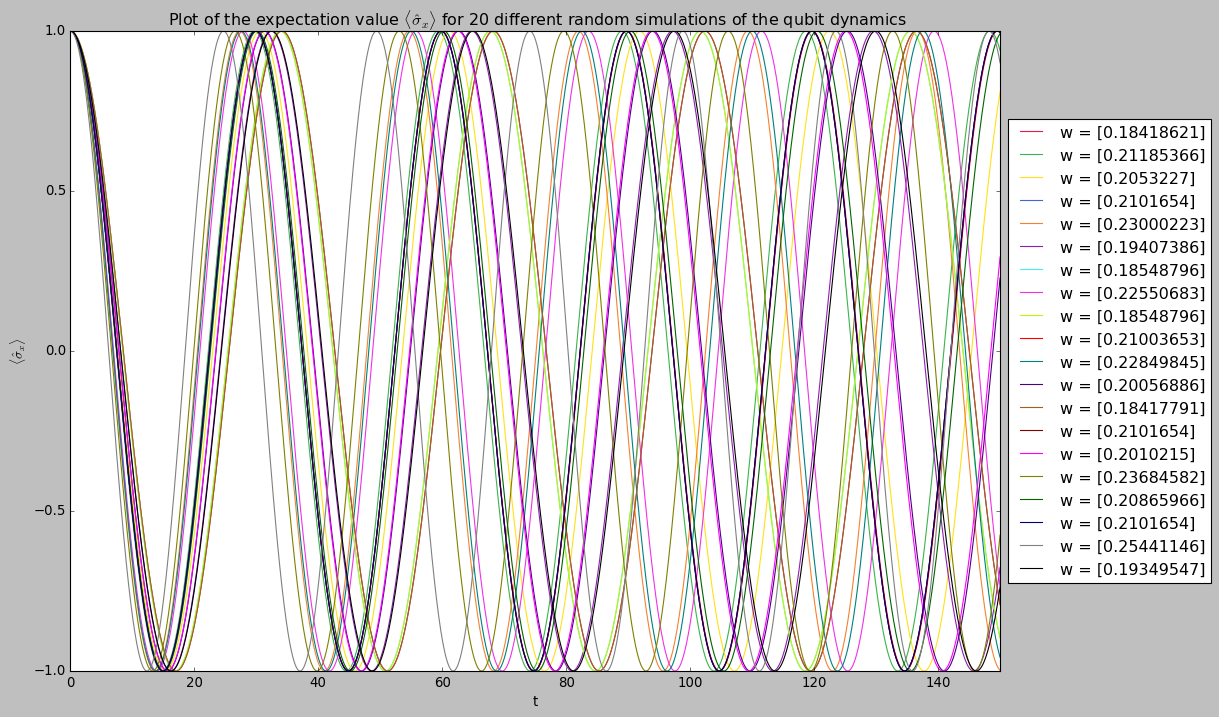

In [129]:
rho_0 = np.outer(plus,plus)

w_0 = 0.2
g = 0.1*w_0
t = np.arange(0,150,0.05)
mu, sigma = w_0, g # mean and standard deviation
W = np.random.normal(mu, sigma, 100)


#defining my expectation function for rho density matrix and A a matrix
def expectation(rho,A):
    return np.trace(rho@A)

#initialising my expectation value matrix to hold 20 different matrices of length t corresponding to 20 
#different values of w
expected = np.zeros((20,len(t),1))


i = 0
w = np.zeros((20,1))
while i<20:
#w is a time independent gaussian random variable that varies in between simulations for slowly fluctuating field
#ie. it takes a time much longer than t for this field to change but will vary between repetitions.
   
    w[i] = np.random.choice(W,1)
    
#every time we do the experiment we have some unitary time evolution governed by our Hamiltonian
    
    Hamiltonian = (1/2)*w[i]*sigma_z
    
    
    rho = rho_0
    U = expm(-1j*(Hamiltonian)*0.05)
    for j in range(len(t)):
        expected[i,j] = np.real(np.array(expectation(rho,sigma_x)))
        rho = U@(rho)@U.conj().T
        
       
    i += 1
plt.figure(figsize = (15,10))
plt.style.use('classic')       
for n in range(20):
    plt.plot(t,expected[n,:],label = 'w = '+str(w[n]),color = cl[n])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('t')
plt.xlim([0,150])
plt.ylabel('$\langle \hat{\sigma}_x\\rangle$')
plt.title( ' Plot of the expectation value $\langle \hat{\sigma}_x\\rangle$ for 20 different random simulations of the qubit dynamics')

(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as
    $$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$
    where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

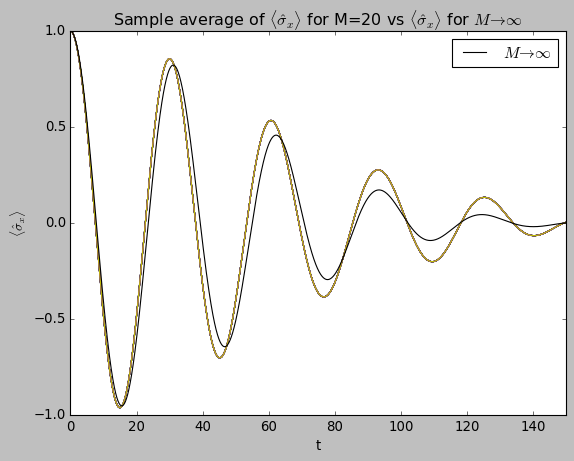

In [130]:
ex = np.zeros(20)
for i in range(20):
    ex =ex+expected[i,:]
plt.plot(t,ex/20)


def f(t):
    return (np.exp(-((g**2)*(t**2))/2))*np.cos(w_0*t)



plt.plot(t,f(t),label ='$M\\to\infty$' )
plt.xlabel('t')
plt.xlim([0,150])
plt.ylabel('$\langle \hat{\sigma}_x\\rangle$')
plt.title('Sample average of $\langle \hat{\sigma}_x\\rangle$ for M=20 vs $\langle \hat{\sigma}_x\\rangle$ for $M\\to\infty$ ')
plt.legend()

For small time the sample average of $\langle \hat{\sigma}_x\rangle$ is a good fit to that of $M\to\infty$. This is due to the exponent in the formula containing a factor of t being outwheighed by the $cos(w_0t)$ factor which is more similar to that of our simple decoherence model as seen in q5.

However, as time gets larger the $t^2$ factor dominates, and the presence of noise ( $g \neq 0$ ) results in the decaying over time and the coherent quantum oscillations get dampened. (Decoherence). This exponential factor of -$g^2$ speeds up the decoherence to a dampened system, as compared to the $M=20$ sample where it is still very much fluctuating for large times.

Hence the $M\to\infty$ sample mimics what we would expect to observe in these circumstances in real life. 


7. The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$
where $\hat{\sigma}_\pm = \frac{1}{2}(\hat{\sigma}_x\pm{\rm i}\hat{\sigma}_y)$ are the usual qubit raising and lowering operators. 

    (a) Verify that the Kraus operators above constitute a CPTP map.
    
    (b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

In [194]:
rho_0 = np.outer(plus,plus)

sigma_p = (0.5)*(sigma_x + (1j)*sigma_y)
sigma_m = (0.5)*(sigma_x - (1j)*sigma_y)

def K(r):
    '''this function takes r as input and outputs the Kraus operators for this q'''
    return ((np.sqrt(1-r))*(sigma_p@sigma_m) + sigma_m@sigma_p),((np.sqrt(r))*sigma_m)

K_0,K_1 = K(0.5)

K_Sum =(K_1.conj().T)@K_1 + (K_0.conj().T)@K_0 
print(K_Sum)

[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


Hence the $ \sum_{i}  \hat{K}^\dagger_i \hat{K_i} = \mathbb{I} $ and thus the Kraus operators above consitute a CPTP map

Text(0, 0.5, '$\\langle \\hat{\\sigma}_{x,y,z}\\rangle$')

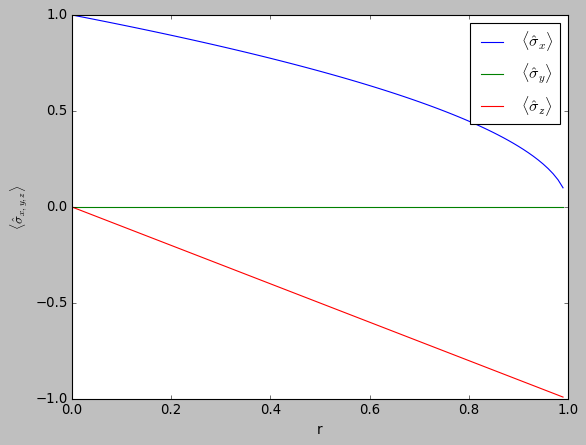

In [195]:
def eps(r,rho):
    '''This function takes r and a state as input and calculates the Density matrix Epsilon(rho)'''
    K_0,K_1 = K(r)
    return K_0@rho@K_0.conj().T + K_1@rho@K_1.conj().T

#Applying the density matrix function recursively for fixed r and varying rho by timesteps delta_t 
rho = np.zeros((1000,2,2),dtype = 'complex')
rho[0] = rho_0
for i in range(1,1000):
    rho[i] = eps(0.05,rho[i-1])
#print(rho)

#applying the density matrix function for fixed timesteps and varying r    
rho1 = np.zeros((100,2,2))#,dtype = 'complex')
r = np.arange(0,1,0.01)
Expectation_x = np.zeros(len(r))
Expectation_y = np.zeros(len(r))#,dtype = 'complex')
Expectation_z = np.zeros(len(r))#,dtype = 'complex')

for i in range(0,100):
    rho1[i] = np.real(eps(r[i],rho_0))
    Expectation_x[i] = np.array(expectation(rho1[i],sigma_x))
    Expectation_y[i] = np.real(expectation(rho1[i],sigma_y))
    Expectation_z[i] = expectation(rho1[i],sigma_z)

plt.plot(r,Expectation_x,label = '$\langle \hat{\sigma}_x\\rangle$')
plt.plot(r,Expectation_y,label = '$\langle \hat{\sigma}_y\\rangle$')
plt.plot(r,Expectation_z,label = '$\langle \hat{\sigma}_z\\rangle$')
plt.legend()
plt.xlabel('r')
plt.ylabel('$\langle \hat{\sigma}_{x,y,z}\\rangle$')

(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.


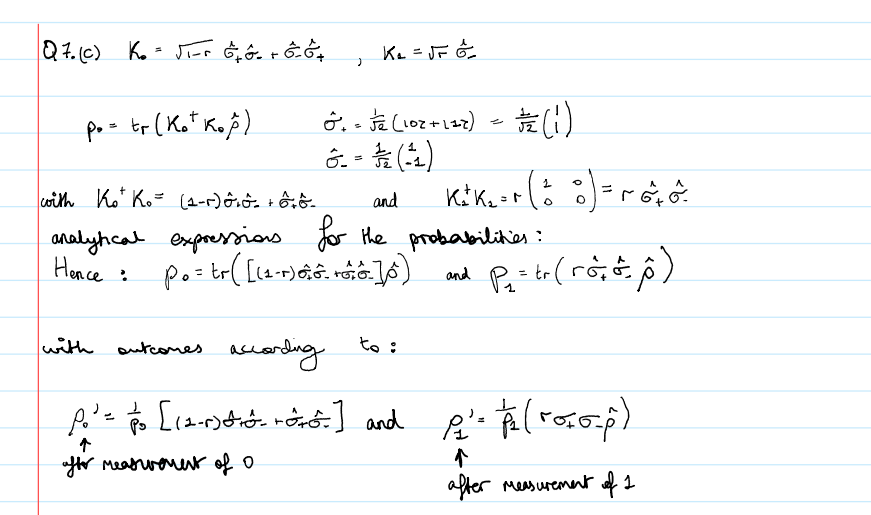

(d) Now consider the generalised measurement defined by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$
As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

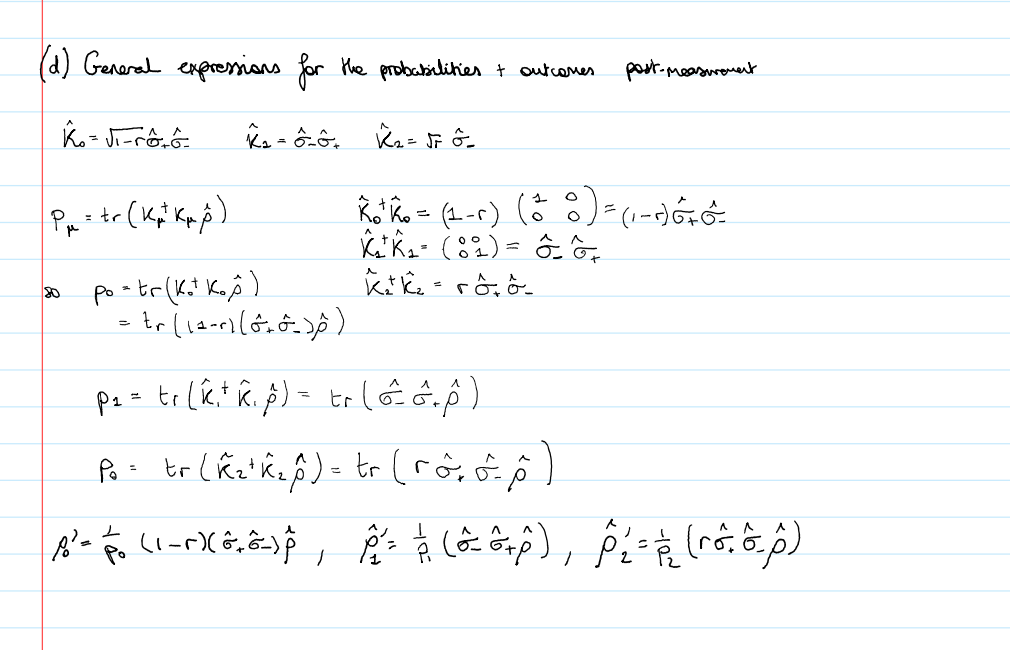

Probabilities =  [(0.25+0j), (0.4999999999999999+0j), (0.25+0j)]


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

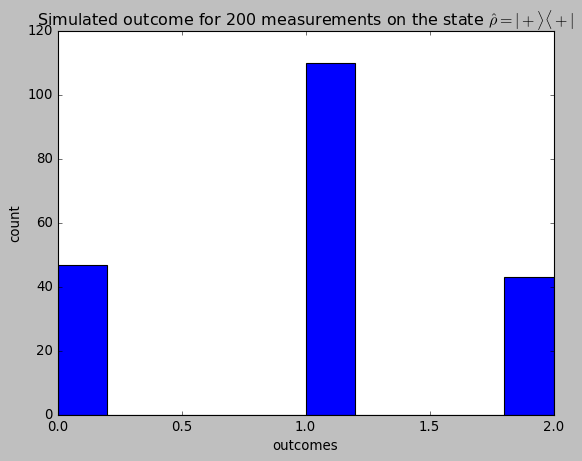

In [196]:
def K(r):
    '''this function takes r as input and outputs the Kraus operators for this q'''
    return ((np.sqrt(1-r))*(sigma_p@sigma_m), (sigma_m@sigma_p),((np.sqrt(r))*sigma_m))

#giving general expresions for the probabilities of each outcome and the corresponding post measurement state
K0,K1,K2 = K(0.5)
probability_0 = np.trace(K0.conj().T @ K0 @ rho_0)
probability_1 = np.trace(K1.conj().T @ K1 @ rho_0)
probability_2 = np.trace(K2.conj().T @ K2 @ rho_0)
Probabilities = [probability_0, probability_1, probability_2]

#plotting
plt.hist([biased_Ncoin(len(Probabilities), Probabilities) for i in range(200)])
plt.title('Simulated outcome for 200 measurements on the state $\hat{\\rho} = |+\\rangle\langle +|$')
plt.xlabel('outcomes')
plt.ylabel('count')
print('Probabilities = ' , Probabilities)
K2.conj().T@K2
M =sigma_p@sigma_m
M@M

8. (a) The partial trace over one qubit of a two-qubit system is defined by

$$ \hat{\rho}_A = {\rm tr}_B ( \hat{\rho}) = \sum_{j=0}^1 \langle b_j| \hat{\rho}|b_j\rangle = \sum_{j=0}^1 (\hat{\mathbb{1}}_A\otimes\langle b_j|) \hat{\rho}(\hat{\mathbb{1}}_A\otimes| b_j\rangle), $$

where $\{|b_j\rangle\}$ is any orthonormal basis in the Hilbert space of qubit $B$. Assume that $|b_{0}\rangle = |0\rangle$ and $|b_1\rangle = |1\rangle$ are the computational basis states. Construct the Kraus operators describing the above CPTP map. Verify numerically that the Kraus operators obey the completeness relation required for a CPTP map.

In [197]:
#Partial trace over a bipartic system 
b_0 = np.array([1,0])
b_1 = np.array([0,1])
I = np.eye(2)

#defining my Kraus operators for this partial trace as the tensor product of the identity and the basis states in B considering qubit A
K_0 = np.kron(I,b_0)
K_1 = np.kron(I,b_1)

Summ = K_0.conj().T@K_0 + K_1.conj().T@K_1
print(Summ, '\n' , 'Hence these Kraus operators obey the completeness relation required for the CPTP map')


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 
 Hence these Kraus operators obey the completeness relation required for the CPTP map


(b) Now consider again the two-qubit problem described by the Hamiltonian

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z,$$

which we saw in question 8 of Worksheet 1. Simulate the dynamics starting from the pure state $|\psi(0)\rangle = |10\rangle$. Use the parameters $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$, and simulate up to a time $Jt = 20$. (You can either re-use your solution from Worksheet 1, or adapt the code from the solution provided.) Compute the reduced density matrix of qubit $A$ and plot its purity, $P = {\rm tr}(\hat{\rho}_A^2)$, as a function of time.

In [393]:
#define parameters
# Define 2x2 identity matrix
psi_0 = np.kron(one, zero)

iden = np.eye(2)   
w_A = w_B = 1
J = V = 0.5*w_A


# Build the Hamiltonian and print it
H = -(w_A/2)*np.kron(sigma_z,iden) - (w_B/2)*np.kron(iden,sigma_z) + (J/4)*(np.kron(sigma_x,sigma_x) + np.kron(sigma_y,sigma_y)) + V/2*np.kron(sigma_z,sigma_z)
print("The Hamiltonian is:\n", np.real(H), "\n")

The Hamiltonian is:
 [[-0.75  0.    0.    0.  ]
 [ 0.   -0.25  0.25  0.  ]
 [ 0.    0.25 -0.25  0.  ]
 [ 0.    0.    0.    1.25]] 



For my time evolution function i adapted the solutions from worksheet 

In [394]:
# Define a function for iteratively carrying out unitary time evolution, with U_dt the evolution operator over
# one timestep, initial state psi_0, total evolution time t_tot, timestep dt, and obs a list of observables
def time_evo(U_dt, psi_0, t_tot, dt, obs):
    
    # Initialise variables
    n_steps = int(t_tot/dt)  # Number of timesteps to take
    n_obs = len(obs)         # Number of observables to compute at each timestep
    psi,t = psi_0, 0.0       # Initial state and time
    t_axis, obs_exp , psi1  = np.zeros(n_steps+1), np.zeros([n_obs,n_steps+1]), np.zeros([n_steps+1,4,1],dtype = 'complex') # Time axis and observable expectation values
                                                                       # (n_steps+1 includes t=0)   
    # Loop over timesteps
    for ii in range(n_steps):
        
        # Compute and store expectation values
        t_axis[ii] = t
        for jj in range(n_obs):
            this_obs = np.vdot(psi,obs[jj]@psi)
            obs_exp[jj,ii] = np.real(this_obs)
            

        
        # Take a step forward in time
        psi = U_dt@psi
        psi1[ii,:] = np.array(psi)
        t += dt
    
    # Compute and store final expectation values
    t_axis[ii+1] = t
    for jj in range(n_obs):
        this_obs = np.vdot(psi,obs[jj]@psi)
        obs_exp[jj,ii+1] = np.real(this_obs)
        
    
    
    return t_axis, obs_exp, psi , psi1

final state=  [[0.        +0.j        ]
 [0.29595897-0.45647263j]
 [0.70404103+0.45647263j]
 [0.        +0.j        ]]


Text(0, 0.5, 'states')

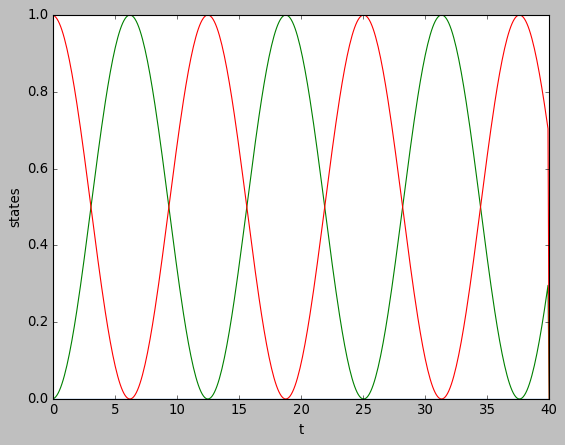

In [395]:
# Set time parameters and generate the time evolution operator

#here i have set w_A = 1 thus J = 0.5 and Jt from 0->20 implies t from 0 -> 40 using a step spacing 0.1
t_tot, dt = 40, 0.1
U_dt = expm(-1j*H*dt)

# Simulation for initial state |10>
(t_axis, [Z], psi, psi1) = time_evo(U_dt, psi_0, t_tot, dt, [np.kron(sigma_z,iden)])
t = np.arange(0,t_tot+dt,dt)

print( 'final state= ',psi) #my state after simulating up to a time Jt = 20 for J = 0.5*1

plt.plot(t,psi1[:,:,0].real)
plt.xlabel('t')
plt.ylabel('states')

In [396]:
rho = np.kron(one, zero)@np.kron(one, zero).T.conj()
trace_t = np.zeros(t.size, dtype=complex) # Array for EV's at times t

#defining my basis and my Kraus operators 
b_0 = np.array([1,0])
b_1 = np.array([0,1])
K_0_A = np.kron(I,b_0).T
K_1_A = np.kron(I,b_1).T

Text(0.5, 1.0, ' $w_A = 1 , J = V = 0.5$')

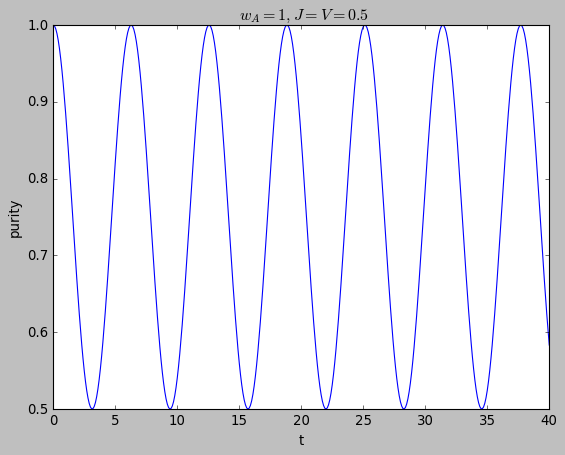

In [397]:
#computing the purities
purity = np.zeros(t.size)

for i in range(t.size):
    P=(np.dot(K_0_A.conj().T,rho@K_0_A)+np.dot(K_1_A.conj().T,rho@K_1_A)).real
    purity[i] = np.sum(P@P)
    rho        = U_dt@rho@U_dt.conj().T
plt.plot(t,purity)
plt.ylabel('purity')
plt.xlabel('t')
plt.title(' $w_A = 1 , J = V = 0.5$')

(c) Repeat the purity calculation of part (b) but with the parameters $\omega_A = 2\omega_B$ and $J=V=0.5\omega_A$. Comment on the differences between the results of (b) and (c).

In [398]:
#define parameters
# Define 2x2 identity matrix
psi_0 = np.kron(one, zero)

iden = np.eye(2)   
w_A = 2
w_B = 1
J = V = 0.5*w_A
# Build the Hamiltonian and print it
H = -(w_A/2)*np.kron(sigma_z,iden) - (w_B/2)*np.kron(iden,sigma_z) + (J/4)*(np.kron(sigma_x,sigma_x) + np.kron(sigma_y,sigma_y)) + V/2*np.kron(sigma_z,sigma_z)
print("The Hamiltonian is:\n", np.real(H), "\n")

The Hamiltonian is:
 [[-1.   0.   0.   0. ]
 [ 0.  -1.   0.5  0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.   0.   2. ]] 



final state=  [[ 0.        +0.j        ]
 [-0.38467627+0.59330584j]
 [-0.38050721+0.5960089j ]
 [ 0.        +0.j        ]]


Text(0, 0.5, 'states')

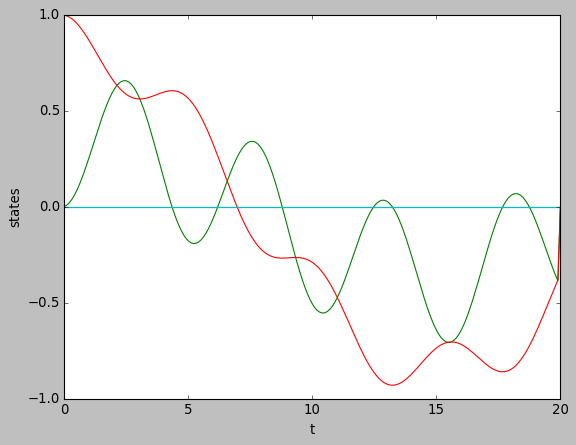

In [404]:
# Set time parameters and generate the time evolution operator
t_tot, dt = 20, 0.1

U_dt = expm(-1j*H*dt)

# Simulation for initial state |10>
(t_axis, [Z], psi, psi1) = time_evo(U_dt, psi_0, t_tot, dt, [np.kron(iden,sigma_z)])
t = np.arange(0,t_tot+dt,dt)
print( 'final state= ',psi) #my state after simulating up to a time Jt = 20 for J = 0.5*1

plt.plot(t,psi1[:,:,0].real)
plt.xlabel('t')
plt.ylabel('states')

In [400]:
rho = np.kron(one, zero)@np.kron(one, zero).T.conj()
trace_t = np.zeros(t.size, dtype=complex) # Array for EV's at times t

b_0 = np.array([1,0])
b_1 = np.array([0,1])
K_0_A = np.kron(I,b_0).T
K_1_A = np.kron(I,b_1).T

Text(0.5, 1.0, '$w_A = 2 , J = V = 1$')

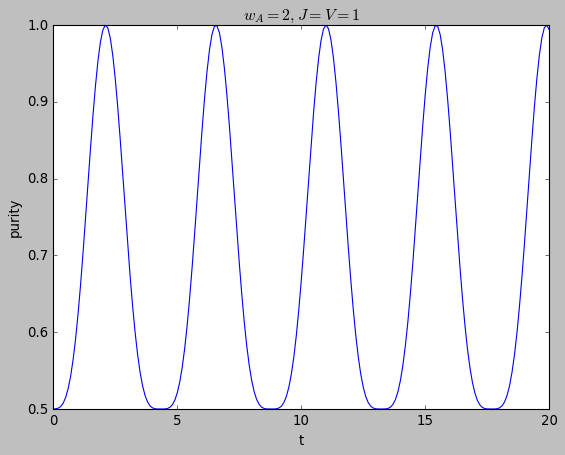

In [402]:
purity = np.zeros(t.size)

for i in range(t.size):
    P = np.dot(K_0_A.conj().T,rho@K_0_A)+np.dot(K_1_A.conj().T,rho@K_1_A)
    purity[i] = np.sum((P@P).real)
    rho = U_dt@rho@U_dt.conj().T
plt.plot(t,purity)
plt.ylabel('purity')
plt.xlabel('t')
plt.title('$w_A = 2 , J = V = 1$')